# Part I - (Ford GoBike System Data)
## by Hasan Al-Amer

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df=pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#explore preperties of dataset
df.shape

(183412, 16)

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#check for duplicated rows
print(df.duplicated().sum())

0


In [7]:
#check for missing values
print(df.isnull().sum())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


### Data Cleaning

In [8]:
# Creating a copy from  dataframe
df_clean = df.copy()

In [9]:
# Drop all columns not needed in the analysis
df_clean.drop(['start_station_id','end_station_id','bike_id','start_station_longitude', 'bike_share_for_all_trip',
                           'start_station_latitude','end_station_longitude','end_station_latitude'],axis=1,inplace=True)

In [10]:
# drop null values from our dataset
df_clean.dropna(inplace=True)

In [11]:
df_clean.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_name    0
end_station_name      0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

In [12]:
df_clean.shape

(174952, 8)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        174952 non-null  int64  
 1   start_time          174952 non-null  object 
 2   end_time            174952 non-null  object 
 3   start_station_name  174952 non-null  object 
 4   end_station_name    174952 non-null  object 
 5   user_type           174952 non-null  object 
 6   member_birth_year   174952 non-null  float64
 7   member_gender       174952 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.0+ MB


In [14]:
#convert start_time and end_time columns dtype to datetirm
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
print(df_clean.start_time.dtype)

datetime64[ns]


In [15]:
# convert data type for `member_birth_year`
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean.member_birth_year.dtype

dtype('int32')

In [16]:
df_clean.sample()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender
78809,281,2019-02-18 18:38:51.451,2019-02-18 18:43:33.232,3rd St at Townsend St,Beale St at Harrison St,Subscriber,1989,Male


In [17]:
# Convert duration to minutes
df_clean['duration_min'] = df_clean.duration_sec/60

In [18]:
#extract day from start_time column
df_clean['start_day']=df_clean['start_time'].dt.day_name()

#extract month from start_time column
df_clean['start_month']=df_clean['start_time'].dt.month_name()

df_clean.head(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,869.750000,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,1030.900000,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,608.166667,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,26.416667,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,29.883333,Thursday,February


In [19]:
df_clean.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

### What is the structure of your dataset?

> The initial dataset includes 183412 rows and has 16 columns. After finish cleaning data 174952 rows and 8 columns

### What is/are the main feature(s) of interest in your dataset?
> 1- When are most trips taken in terms of time of day?  
> 2- How long does the average trip take?  
> 3- Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the features in the dataset will help support my investigation are:  
>['user_type', 'member_birth_year', 'member_gender', 'start_station_name', 'end_station_name', 'duration_min']

In [20]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,869.750000,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,1030.900000,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,608.166667,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,26.416667,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,29.883333,Thursday,February


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


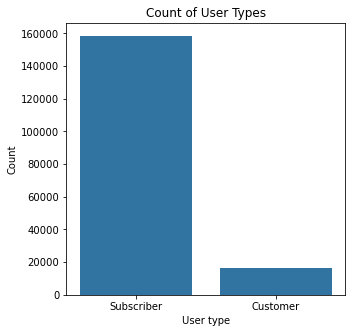

In [21]:
# User types to get an idea of counts
plt.figure(figsize=[5,5]);
base_color = sb.color_palette()[0]

sb.countplot(data=df_clean, x = 'user_type', color=base_color, order=df.user_type.value_counts().index)
plt.title('Count of User Types')
plt.xlabel('User type')
plt.ylabel('Count');

In [22]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

**Observation:** Count of user types Subscriber greater than Customer

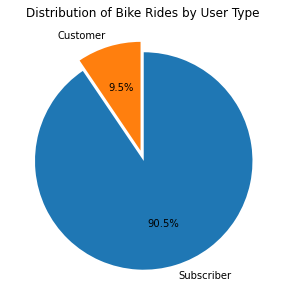

In [23]:
#Distribution of bike users by user type
plt.figure(figsize=[5,5])
explode= (0.02, 0.08)
user_type=df_clean.user_type.value_counts()
plt.pie(user_type, labels= user_type.index, autopct='%1.1f%%',explode=explode, startangle=90, 
        shadow= False, counterclock= False);
plt.title('Distribution of Bike Rides by User Type');

**Observation:** The most common user type is Subscriber with 90.5%

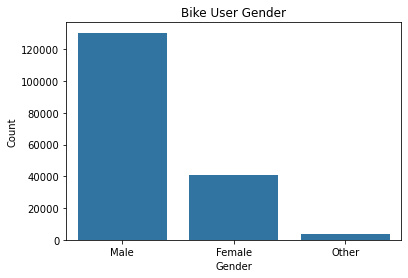

In [24]:
# User Gender to get an idea of counts
sb.countplot(data = df_clean, x = 'member_gender', color = base_color, order=df_clean.member_gender.value_counts().index)
plt.title('Bike User Gender')
plt.xlabel('Gender')
plt.ylabel('Count');
plt.show()

**Observation:** Male is the most bike user gender.

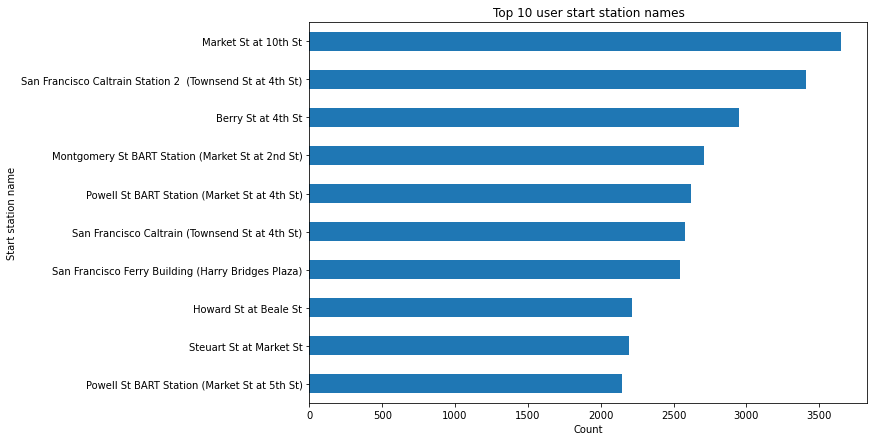

In [25]:
plt.figure(figsize=[10,7])
df_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh()
plt.title('Top 10 user start station names');
plt.xlabel('Count');
plt.ylabel('Start station name');

**Observation:** The most common start station is Market St at 10th St.

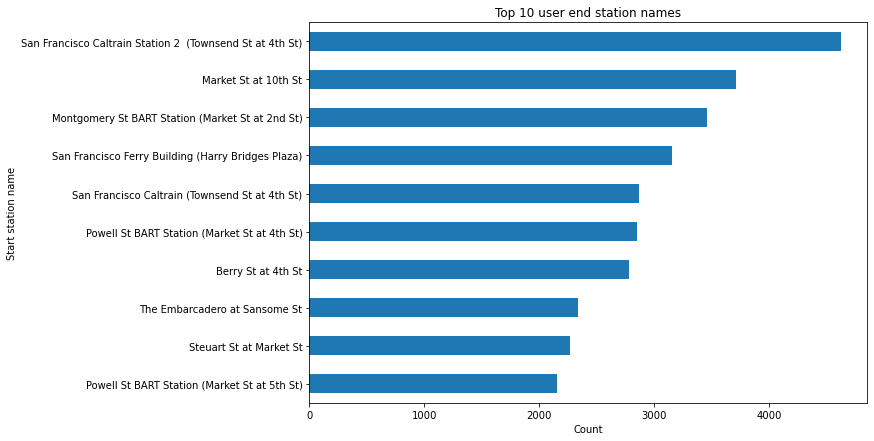

In [26]:
plt.figure(figsize=[10,7])
df_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh()
plt.title('Top 10 user end station names');
plt.xlabel('Count');
plt.ylabel('Start station name');

**Observation:** The most common end station is San Francisco Caltrain Station 2 (Townsend St at 4th St)

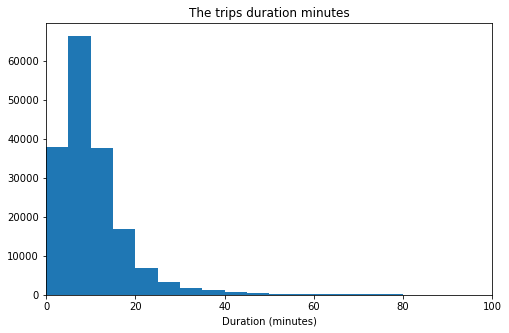

In [27]:
# Distribution of duration in minutes
binsize = 5
bins = np.arange(0, df_clean.duration_min.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins=bins)
plt.xlabel('Duration (minutes)')
plt.title('The trips duration minutes');
plt.xlim([0, 100]);

In [28]:
df_clean.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

**Observation:** The average of the trip duration is 11.73 minutes

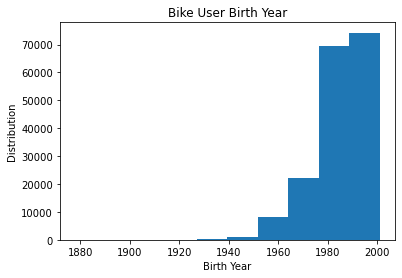

In [29]:
plt.hist(data = df_clean, x = 'member_birth_year')
plt.title('Bike User Birth Year');
plt.xlabel('Birth Year');
plt.ylabel('Distribution');
plt.show()

In [30]:
df_clean.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

**Observation:** The bike users birth year from 1878 to 2001. The most common age group for bike users' birth year is around 1980 to 2001

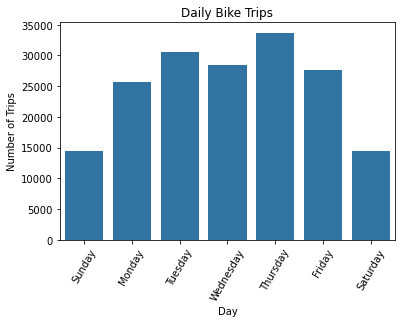

In [31]:
# Distribution of Daily Bike Trips

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df_clean.start_day= df_clean.start_day.astype(day_of_week)

sb.countplot(data=df_clean, x='start_day', color= base_color);
plt.xticks(rotation= 60);
plt.xlabel('Day');
plt.ylabel('Number of Trips');
plt.title('Daily Bike Trips');

**Observation:** The most two common days for bike users' are Thursday and Tuesday

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration seconds was converted to minutes for easy understanding of the values. Also, I extract the necessary information from the start_time column such as day and month.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there are tidy  
> - Data types of columns  
> - some null values in columns [start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender]    

>**Change the data types to be suitable and drop null values as there is an enough data to achieve our interest**

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

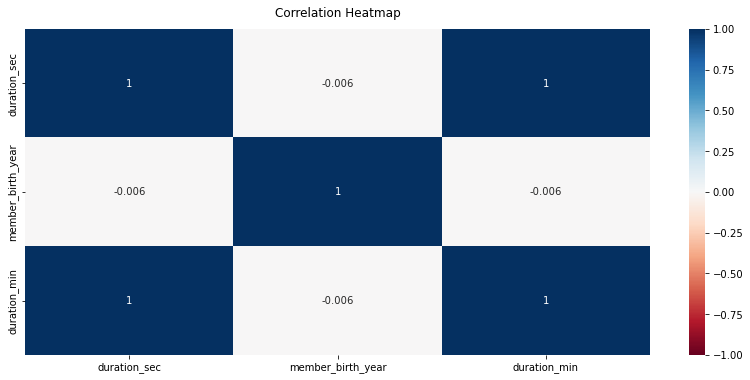

In [32]:
#Correlation between each column
plt.figure(figsize=(14, 6))
sb.heatmap(df_clean.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

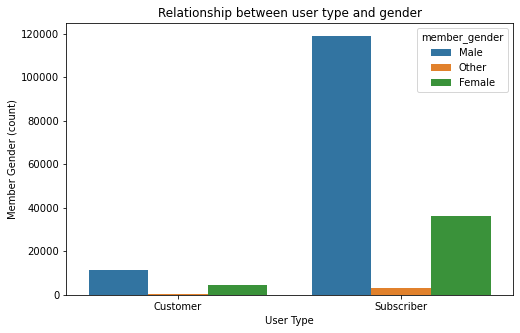

In [33]:
# Relationship between user type and gender
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean, x='user_type', hue='member_gender');
plt.title('Relationship between user type and gender');
plt.xlabel('User Type');
plt.ylabel('Member Gender (count)');

**Observation:** The most common bike users are Subscribers from Males.

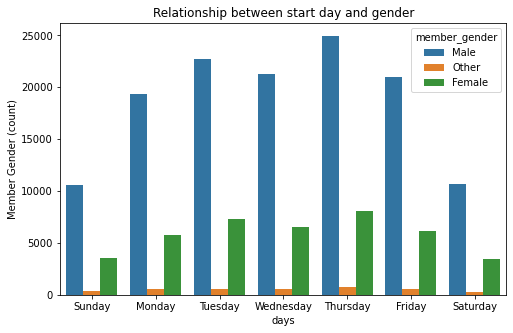

In [34]:
# Relationship between start day and gender
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean, x='start_day', hue='member_gender');
plt.title('Relationship between start day and gender');
plt.xlabel('days');
plt.ylabel('Member Gender (count)');

**Observation:** The most common day which bike users are Thursday from Males.

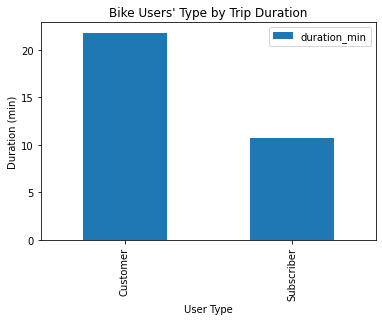

In [35]:
df_clean[['duration_min', 'user_type']].groupby('user_type').mean().plot.bar()
plt.title("Bike Users' Type by Trip Duration");
plt.xlabel('User Type');
plt.ylabel('Duration (min)');
plt.show()

**Observation:** Users customers have longer ride duration than subscribers.

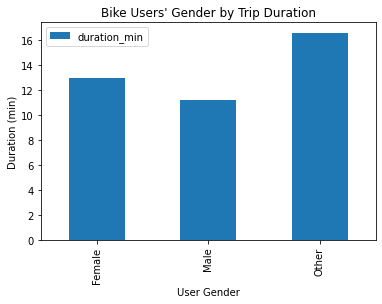

In [36]:
df_clean[['duration_min', 'member_gender']].groupby('member_gender').mean().plot.bar()
plt.title("Bike Users' Gender by Trip Duration");
plt.xlabel('User Gender');
plt.ylabel('Duration (min)');
plt.show()

**Observation:** Females have longer trip duration than Males.

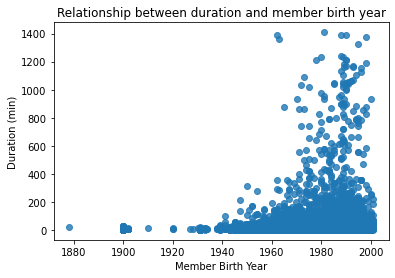

In [37]:
# Relationship between user age and duration in minutes
sb.regplot(data = df_clean, x='member_birth_year', y='duration_min',
           x_jitter= 0.04, fit_reg=False)
plt.title('Relationship between duration and member birth year');
plt.xlabel('Member Birth Year');
plt.ylabel('Duration (min)');

**Observation:** The bike users birth year from 1878 to 2001. The most common age group for bike users' birth year is around 1980 to 2001.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The most common bike users are Subscribers from Males.  
> - The most common day which bike users are Thursday from Males.  
> - Users customers have longer ride duration than subscribers.  
> - Females have longer trip duration than Males.  
> - The bike users birth year from 1878 to 2001. The most common age group for bike users' birth year is around 1980 to 2001.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I think the trip duration changes depend on user type or gender.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

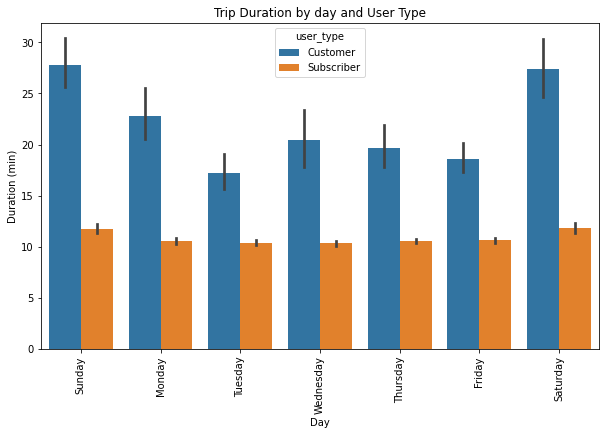

In [38]:
#day vs duration vs user_type
plt.figure(figsize=[10,6]);
sb.barplot(data=df_clean, x='start_day', y='duration_min', hue='user_type');
plt.xticks(rotation= 90);
plt.title('Trip Duration by day and User Type');
plt.xlabel('Day');
plt.ylabel('Duration (min)');


**Observation:** Depend on three factors (day, duration & user type), we notice that averagely customers spend time twice as much subscribers on daily basis; however, they tend to spend more time on weekends (Saturday & Sunday).

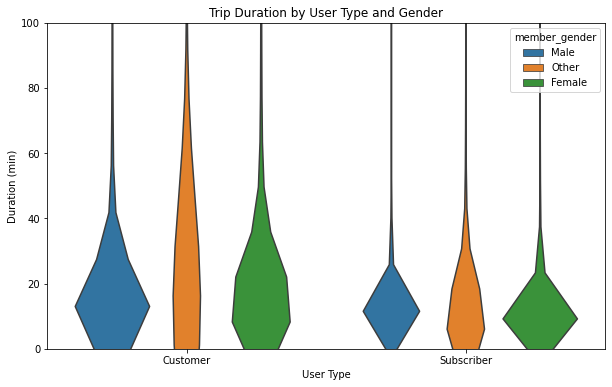

In [39]:
#user_type vs duration vs member_gender
plt.figure(figsize=[10,6]);
sb.violinplot(data=df_clean,  x='user_type', y="duration_min", hue="member_gender", inner=None)
plt.ylim([0,100])
plt.title('Trip Duration by User Type and Gender');
plt.xlabel('User Type');
plt.ylabel('Duration (min)');

**Observation:** Depend on three factors (user type, duration & user gender), we notice that Customers rides much longer durations than subscribers no matter what the gender they are.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The most of the riders are in between 1980 and 2000

### Were there any interesting or surprising interactions between features?

> Customers rides much longer durations than subscribers no matter what the gender they are.

## Conclusions
>- The most common user type is Subscriber with 90.5%.  
>- The average of the trip duration is 11.73 minutes.  
>- Male is the most bike user gender.  
>- we notice that averagely customers spend time twice as much subscribers on daily basis; however, they tend to spend more time on weekends (Saturday & Sunday).  
>- we notice that Customers rides much longer durations than subscribers no matter what the gender they are.  


In [40]:
#Store the cleaned (CSV) file to use it in the presnetation step
df_clean.to_csv('clean_file.csv', index=False)